this code notebook consists of creating  Graph theory measures saving them out as csvs and plotting them as graphs


1. Participation Coefficient
2. Normalized PC
3. Degree centrality
3. Strength
4. Betweeness Centrality
5. Hubs and connectors


In [6]:
#import statements

import numpy as np
import pandas as pd
import bct as bct
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import os
import glob as glob


In [7]:
#tihs cell loads the data and creates the adjacency matrix 
#Path to the folder containing your files
folder_path = '/Users/venturelab/Downloads/seitzman_atlas_correlation_withoutgsr/'

# Use glob to find all files with a particular pattern, for example, all CSV files
file_pattern = '*.csv'
csv_files = glob.glob(os.path.join(folder_path, file_pattern))

# Initialize session-specific lists
subject_correlation_s1 = []
subject_correlation_s2 = []
subject_correlation_s3 = []

# Dictionary to hold dataframes
dfs = {}

# Group the files by subject and session into a dictionary
for file in csv_files:
    subject_session = file.split('/')[-1].split('.')[0].split('_correlation_matrix')[0]
    dfs[subject_session] = pd.read_csv(file, header=None)
    
    if 'ses-01' in subject_session:
        subject_correlation_s1.append(dfs[subject_session].values)
    elif 'ses-02' in subject_session:
        subject_correlation_s2.append(dfs[subject_session].values)
    elif 'ses-03' in subject_session:
        subject_correlation_s3.append(dfs[subject_session].values)

# Define your threshold and Ci values
threshold_proportion = 0.25  # Adjust as needed
df = pd.read_excel("/Users/venturelab/Downloads/seitzman_atlas_final.xlsx", header=None)
Ci = df.iloc[:, 8].values  # You need to define Ci based on your data
coordinates = df.iloc[:, 3:6].values  # Assuming columns 3 to 5 contain the MNI coordinates

# Function for computing threshold matrix and binarizing it
def threshold_binarize_matrix(W, threshold_proportion):
    # Threshold the matrix
    thresholded_matrix = bct.threshold_proportional(W, threshold_proportion)
    
    # Binarize the thresholded matrix
    adjacency_matrix = bct.binarize(thresholded_matrix, copy=True)
    
    return adjacency_matrix

In [8]:
#function to compute graph measures PC, degree, strength, degree centrality, betweenness centrality,

def compute_pc(adjacency_matrix, Ci):
    PC = bct.participation_coef(adjacency_matrix, Ci)
    return PC

# Add functions to calculate degree, strength, and betweenness
def compute_graph_measures(adjacency_matrix):
    G = nx.from_numpy_array(adjacency_matrix)

    # Degree centrality (unweighted)
    degree_centrality = nx.degree_centrality(G)

    # Strength (weighted degree)
    strength = dict(G.degree(weight='weight'))

    # Betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

    return degree_centrality, strength, betweenness_centrality

In [9]:
#computing PC for each subject and session

PC_s1 = []
PC_s2 = []
PC_s3 = []

for subject in subject_correlation_s1:
    adjacency_matrix = threshold_binarize_matrix(subject, threshold_proportion)
    PC_s1.append(compute_pc(adjacency_matrix, Ci))
    
for subject in subject_correlation_s2:
    adjacency_matrix = threshold_binarize_matrix(subject, threshold_proportion)
    PC_s2.append(compute_pc(adjacency_matrix, Ci))

for subject in subject_correlation_s3:
    adjacency_matrix = threshold_binarize_matrix(subject, threshold_proportion)
    PC_s3.append(compute_pc(adjacency_matrix, Ci))



/Applications/anaconda3/envs/neuroventure/lib/python3.11/site-packages/bct/algorithms/centrality.py:786: RuntimeWarning: invalid value encountered in divide
  P = np.ones((n,)) - Kc2 / np.square(Ko)


In [10]:
#computing degree, strength, degree centrality, betweenness centrality for each subject and session

degree_s1 = []
strength_s1 = []
degree_centrality_s1 = []
betweenness_centrality_s1 = []

degree_s2 = []
strength_s2 = []
degree_centrality_s2 = []
betweenness_centrality_s2 = []

degree_s3 = []
strength_s3 = []
degree_centrality_s3 = []
betweenness_centrality_s3 = []


for subject in subject_correlation_s1:
    adjacency_matrix = threshold_binarize_matrix(subject, threshold_proportion)
    degree_centrality, strength, betweenness_centrality = compute_graph_measures(adjacency_matrix)
    strength_s1.append(strength)
    degree_centrality_s1.append(degree_centrality)
    betweenness_centrality_s1.append(betweenness_centrality)
    
for subject in subject_correlation_s2:
    adjacency_matrix = threshold_binarize_matrix(subject, threshold_proportion)
    degree_centrality, strength, betweenness_centrality = compute_graph_measures(adjacency_matrix)
    strength_s2.append(strength)
    degree_centrality_s2.append(degree_centrality)
    betweenness_centrality_s2.append(betweenness_centrality)

for subject in subject_correlation_s3:
    adjacency_matrix = threshold_binarize_matrix(subject, threshold_proportion)
    degree_centrality, strength, betweenness_centrality = compute_graph_measures(adjacency_matrix)
    strength_s3.append(strength)
    degree_centrality_s3.append(degree_centrality)
    betweenness_centrality_s3.append(betweenness_centrality)
    

In [11]:
#graphically visualize all the measures as an avg across all subjects per session



#get average results for each session for each measure 
PC_s1_avg = np.mean(PC_s1, axis=0)
PC_s2_avg = np.mean(PC_s2, axis=0)
PC_s3_avg = np.mean(PC_s3, axis=0)


#for degree centrality
degree_centrality_s1_avg = {}
degree_centrality_s2_avg = {}
degree_centrality_s3_avg = {}


for i in range(len(degree_centrality_s1)):
    for key in degree_centrality_s1[i]:
        degree_centrality_s1_avg[key] = degree_centrality_s1_avg.get(key, 0) + degree_centrality_s1[i][key]
        
for i in range(len(degree_centrality_s2)):
    for key in degree_centrality_s2[i]:
        degree_centrality_s2_avg[key] = degree_centrality_s2_avg.get(key, 0) + degree_centrality_s2[i][key]
        
for i in range(len(degree_centrality_s3)):
    for key in degree_centrality_s3[i]:
        degree_centrality_s3_avg[key] = degree_centrality_s3_avg.get(key, 0) + degree_centrality_s3[i][key]
        
for key in degree_centrality_s1_avg:
    degree_centrality_s1_avg[key] = degree_centrality_s1_avg[key]/len(degree_centrality_s1)
    
for key in degree_centrality_s2_avg:
    degree_centrality_s2_avg[key] = degree_centrality_s2_avg[key]/len(degree_centrality_s2)

for key in degree_centrality_s3_avg:
    degree_centrality_s3_avg[key] = degree_centrality_s3_avg[key]/len(degree_centrality_s3)
    
#for strength
strength_s1_avg = {}
strength_s2_avg = {}
strength_s3_avg = {}

for i in range(len(strength_s1)):
    for key in strength_s1[i]:
        strength_s1_avg[key] = strength_s1_avg.get(key, 0) + strength_s1[i][key]
        
for i in range(len(strength_s2)):
    for key in strength_s2[i]:
        strength_s2_avg[key] = strength_s2_avg.get(key, 0) + strength_s2[i][key]

for i in range(len(strength_s3)):
    for key in strength_s3[i]:
        strength_s3_avg[key] = strength_s3_avg.get(key, 0) + strength_s3[i][key]

for key in strength_s1_avg:
    strength_s1_avg[key] = strength_s1_avg[key]/len(strength_s1)

for key in strength_s2_avg:
    strength_s2_avg[key] = strength_s2_avg[key]/len(strength_s2)

for key in strength_s3_avg:
    strength_s3_avg[key] = strength_s3_avg[key]/len(strength_s3)
    
#for betweenness centrality
betweenness_centrality_s1_avg = {}
betweenness_centrality_s2_avg = {}
betweenness_centrality_s3_avg = {}

for i in range(len(betweenness_centrality_s1)):
    for key in betweenness_centrality_s1[i]:
        betweenness_centrality_s1_avg[key] = betweenness_centrality_s1_avg.get(key, 0) + betweenness_centrality_s1[i][key]

for i in range(len(betweenness_centrality_s2)):
    for key in betweenness_centrality_s2[i]:
        betweenness_centrality_s2_avg[key] = betweenness_centrality_s2_avg.get(key, 0) + betweenness_centrality_s2[i][key]

for i in range(len(betweenness_centrality_s3)):
    for key in betweenness_centrality_s3[i]:
        betweenness_centrality_s3_avg[key] = betweenness_centrality_s3_avg.get(key, 0) + betweenness_centrality_s3[i][key]
        
for key in betweenness_centrality_s1_avg:
    betweenness_centrality_s1_avg[key] = betweenness_centrality_s1_avg[key]/len(betweenness_centrality_s1)
    
for key in betweenness_centrality_s2_avg:
    betweenness_centrality_s2_avg[key] = betweenness_centrality_s2_avg[key]/len(betweenness_centrality_s2)
    
for key in betweenness_centrality_s3_avg:
    betweenness_centrality_s3_avg[key] = betweenness_centrality_s3_avg[key]/len(betweenness_centrality_s3)
    


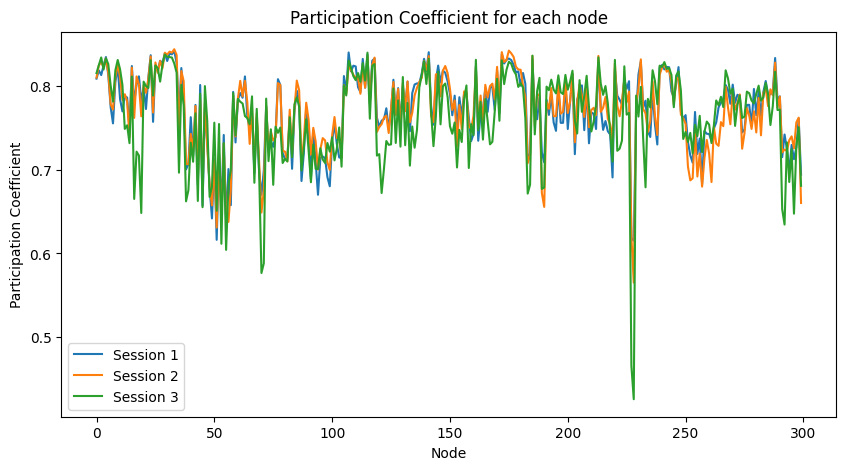

In [12]:
#plotting the results

#PC
plt.figure(figsize=(10, 5))
plt.plot(PC_s1_avg, label='Session 1')
plt.plot(PC_s2_avg, label='Session 2')
plt.plot(PC_s3_avg, label='Session 3')
plt.xlabel('Node')
plt.ylabel('Participation Coefficient')
plt.title('Participation Coefficient for each node')
plt.legend()
plt.show()

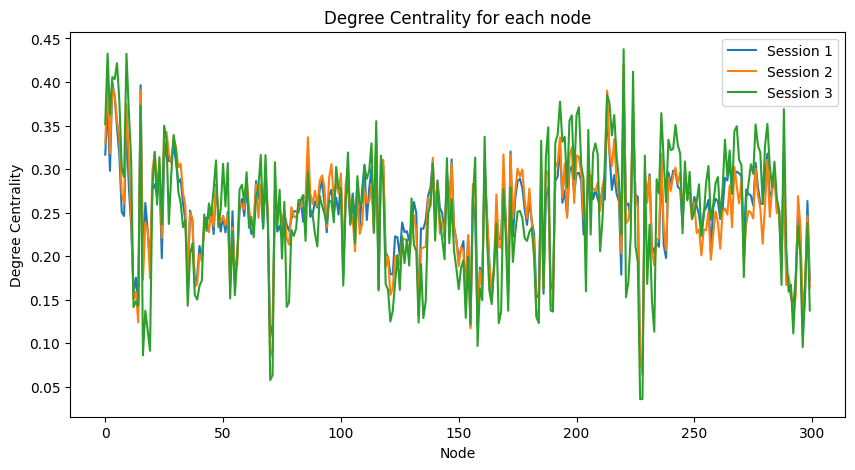

In [13]:
#plot degree centrality

plt.figure(figsize=(10, 5))
plt.plot(degree_centrality_s1_avg.values(), label='Session 1')
plt.plot(degree_centrality_s2_avg.values(), label='Session 2')
plt.plot(degree_centrality_s3_avg.values(), label='Session 3')

plt.xlabel('Node')
plt.ylabel('Degree Centrality')
plt.title('Degree Centrality for each node')
plt.legend()
plt.show()


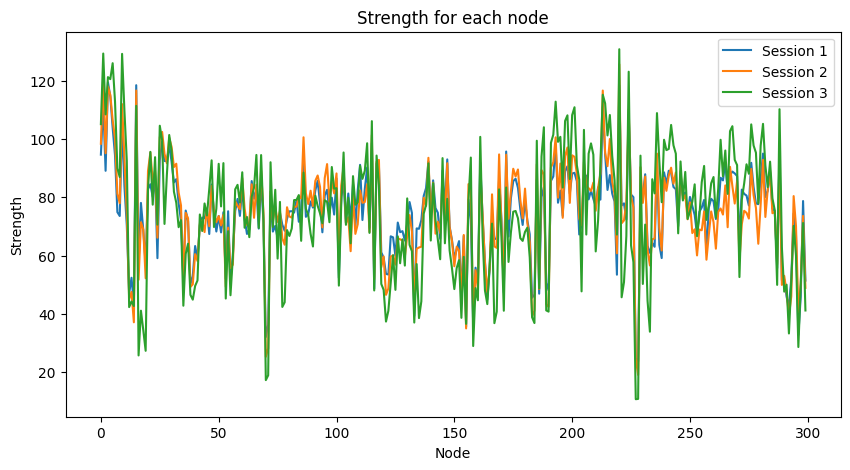

In [14]:
#plot strength

plt.figure(figsize=(10, 5))
plt.plot(strength_s1_avg.values(), label='Session 1')
plt.plot(strength_s2_avg.values(), label='Session 2')
plt.plot(strength_s3_avg.values(), label='Session 3')

plt.xlabel('Node')
plt.ylabel('Strength')
plt.title('Strength for each node')
plt.legend()
plt.show()

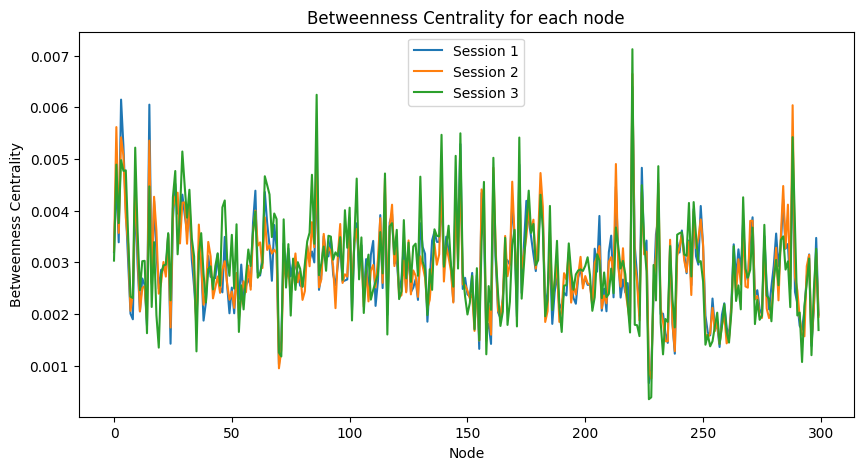

In [15]:
#plot betweenness centrality

plt.figure(figsize=(10, 5))
plt.plot(betweenness_centrality_s1_avg.values(), label='Session 1')
plt.plot(betweenness_centrality_s2_avg.values(), label='Session 2')
plt.plot(betweenness_centrality_s3_avg.values(), label='Session 3')

plt.xlabel('Node')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality for each node')
plt.legend()

plt.show()

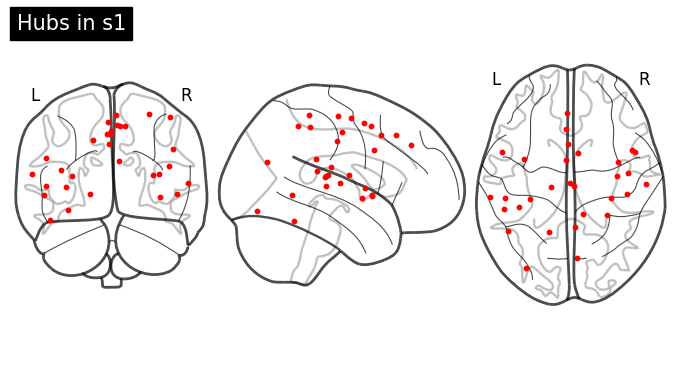

Hub regions in s1: ['4_cortexR', '16_cortexL', '221_cortexMid', '5_cortexL', '2_cortexL', '214_cortexL', '225_cortexR', '10_cortexR', '6_cortexL', '27_cortexL', '116_cortexR', '194_cortexR', '30_cortexL', '289_cortexL', '173_cortexL', '282_cortexL', '215_cortexR', '1_cortexL', '7_cortexR', '148_cortexL', '26_cortexR', '237_cortexR', '29_cortexR', '28_cortexL', '140_cortexR', '31_cortexR', '87_cortexL', '266_cortexL', '162_cortexR', '277_cortexR']


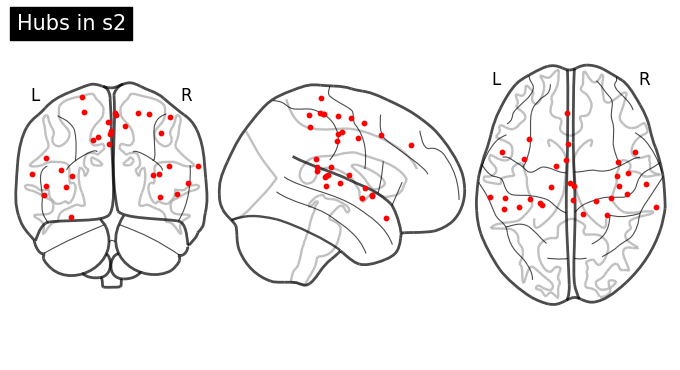

Hub regions in s2: ['221_cortexMid', '2_cortexL', '4_cortexR', '16_cortexL', '214_cortexL', '5_cortexL', '10_cortexR', '225_cortexR', '6_cortexL', '27_cortexL', '116_cortexR', '26_cortexR', '87_cortexL', '194_cortexR', '30_cortexL', '7_cortexR', '217_cortexR', '1_cortexL', '31_cortexR', '199_cortexL', '22_cortexL', '215_cortexR', '3_cortexR', '237_cortexR', '28_cortexL', '170_cortexL', '173_cortexL', '201_cortexR', '198_cortexL', '202_cortexR']


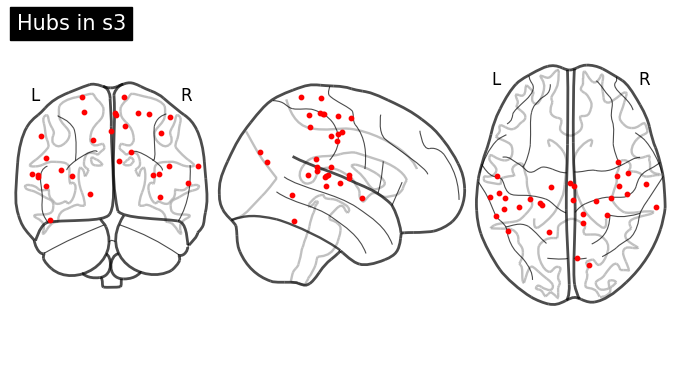

Hub regions in s3: ['221_cortexMid', '2_cortexL', '10_cortexR', '6_cortexL', '225_cortexR', '4_cortexR', '5_cortexL', '214_cortexL', '7_cortexR', '194_cortexR', '215_cortexR', '16_cortexL', '202_cortexR', '289_cortexL', '11_cortexL', '237_cortexR', '3_cortexR', '217_cortexR', '201_cortexR', '199_cortexL', '198_cortexL', '116_cortexR', '282_cortexL', '1_cortexL', '277_cortexR', '243_cortexL', '26_cortexR', '269_cortexR', '189_cortexR', '206_cortexL']


In [18]:
import numpy as np
from nilearn import plotting
import matplotlib.pyplot as plt

# Create a dictionary to hold the average degree centrality for each session
average_results = {
    's1': degree_centrality_s1_avg,
    's2': degree_centrality_s2_avg,
    's3': degree_centrality_s3_avg
}

# Calculate the 90th percentile threshold for each session
thresholds = {session: np.percentile(list(average_results[session].values()), 90) for session in average_results}

# Identify the hubs for each session
hubs_per_session = {
    session: [key for key, val in average_results[session].items() if val >= thresholds[session]]
    for session in average_results
}

# Assuming you have a dictionary `coordinates` that maps keys to their coordinates
# and a dictionary `atlas_region` that maps keys to their region names
atlas_region = df.iloc[:, 1].values  # Assuming column 2 contains the region names

for session in hubs_per_session:
    hubs_indices = hubs_per_session[session]
    hub_coords = [coordinates[key] for key in hubs_indices]  # Get the coordinates of the hubs for the session

    # Create a display object (here: glass brain)
    display = plotting.plot_glass_brain(None, display_mode='ortho', plot_abs=False,
                                        title=f'Hubs in {session}')

    # Add markers one by one
    for coord in hub_coords:
        display.add_markers([coord], marker_color='red', marker_size=10)

    plt.show()

    # Add labels to hubs based on their region names
    hub_regions = [atlas_region[key] for key in hubs_indices]
    print(f"Hub regions in {session}: {hub_regions}")